In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from matplotlib.ticker import PercentFormatter
from plotnine import *
from sklearn.linear_model import LinearRegression
from scipy import signal
from statsmodels.tsa.seasonal import seasonal_decompose, STL

C:\Users\Jish\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Jish\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (
C:\Users\Jish\AppData\Local\Temp\ipykernel_41112\528794465.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
os.getcwd()

'C:\\Users\\Jish\\Documents\\DRiV\\Files\\Elasticity\\AMER\\Monroe'

In [3]:
df=pd.read_csv('Strut_Assemblies_Python.csv')
df.head()

,LC,Part/Sku,Year,Month_Num,Month,Sales,Qty,Price,Inflation,AutoPartSales,ConsumerConfidence,Income,Production,RepairPrice,PartsPrice,MilesDriven
0,2a,139104,2019,1,January,120519.96010,869,138.688101,1.6,7088.0,121.7,1335.65,95.38,290.76,145.59,246517.0
1,2a,139105,2019,1,January,167227.80010,1186,141.001518,1.6,7088.0,121.7,1335.65,95.38,290.76,145.59,246517.0
2,1a,139112,2019,1,January,22852.63004,136,168.034044,1.6,7088.0,121.7,1335.65,95.38,290.76,145.59,246517.0
3,2a,171100,2019,1,January,18465.60999,137,134.785474,1.6,7088.0,121.7,1335.65,95.38,290.76,145.59,246517.0
4,2b,171101L,2019,1,January,12431.65002,93,133.673656,1.6,7088.0,121.7,1335.65,95.38,290.76,145.59,246517.0


In [4]:
df.dtypes

LC                     object
Part/Sku               object
Year                    int64
Month_Num               int64
Month                  object
Sales                 float64
Qty                     int64
Price                 float64
Inflation             float64
AutoPartSales         float64
ConsumerConfidence    float64
Income                float64
Production            float64
RepairPrice           float64
PartsPrice            float64
MilesDriven           float64
dtype: object

In [5]:
df['Day'] = "1"
df['Year']=df['Year'].astype(str)
df['Month_Num']=df['Month_Num'].astype(str)
# df['Month1']=df['Month_Num']
# df['Year_Month']=pd.to_datetime(df[["Year", "Month", "Day"]])
df['Year_Month']=pd.to_datetime(df.Year+df.Month_Num+df.Day, format="%Y%m%d")
df.rename(columns={'Price':'Price'}, inplace=True)
df.rename(columns={'Units':'Qty'}, inplace=True)
df.rename(columns={'Part/Sku':'Material'}, inplace=True)

In [6]:
df.dtypes

LC                            object
Material                      object
Year                          object
Month_Num                     object
Month                         object
Sales                        float64
Qty                            int64
Price                        float64
Inflation                    float64
AutoPartSales                float64
ConsumerConfidence           float64
Income                       float64
Production                   float64
RepairPrice                  float64
PartsPrice                   float64
MilesDriven                  float64
Day                           object
Year_Month            datetime64[ns]
dtype: object

In [7]:
df.head()

,LC,Material,Year,Month_Num,Month,Sales,Qty,Price,Inflation,AutoPartSales,ConsumerConfidence,Income,Production,RepairPrice,PartsPrice,MilesDriven,Day,Year_Month
0,2a,139104,2019,1,January,120519.96010,869,138.688101,1.6,7088.0,121.7,1335.65,95.38,290.76,145.59,246517.0,1,2019-01-01
1,2a,139105,2019,1,January,167227.80010,1186,141.001518,1.6,7088.0,121.7,1335.65,95.38,290.76,145.59,246517.0,1,2019-01-01
2,1a,139112,2019,1,January,22852.63004,136,168.034044,1.6,7088.0,121.7,1335.65,95.38,290.76,145.59,246517.0,1,2019-01-01
3,2a,171100,2019,1,January,18465.60999,137,134.785474,1.6,7088.0,121.7,1335.65,95.38,290.76,145.59,246517.0,1,2019-01-01
4,2b,171101L,2019,1,January,12431.65002,93,133.673656,1.6,7088.0,121.7,1335.65,95.38,290.76,145.59,246517.0,1,2019-01-01


In [8]:
df.isna().sum()

LC                       0
Material                 0
Year                     0
Month_Num                0
Month                    0
Sales                    0
Qty                      0
Price                    0
Inflation              962
AutoPartSales         1958
ConsumerConfidence    1958
Income                1958
Production             962
RepairPrice            962
PartsPrice             962
MilesDriven           1958
Day                      0
Year_Month               0
dtype: int64

In [9]:
df=df.dropna(axis=0, subset=('Price', ))

In [10]:
# df['Price'] = df['Price'].astype(float)

In [11]:
df.head()

,LC,Material,Year,Month_Num,Month,Sales,Qty,Price,Inflation,AutoPartSales,ConsumerConfidence,Income,Production,RepairPrice,PartsPrice,MilesDriven,Day,Year_Month
0,2a,139104,2019,1,January,120519.96010,869,138.688101,1.6,7088.0,121.7,1335.65,95.38,290.76,145.59,246517.0,1,2019-01-01
1,2a,139105,2019,1,January,167227.80010,1186,141.001518,1.6,7088.0,121.7,1335.65,95.38,290.76,145.59,246517.0,1,2019-01-01
2,1a,139112,2019,1,January,22852.63004,136,168.034044,1.6,7088.0,121.7,1335.65,95.38,290.76,145.59,246517.0,1,2019-01-01
3,2a,171100,2019,1,January,18465.60999,137,134.785474,1.6,7088.0,121.7,1335.65,95.38,290.76,145.59,246517.0,1,2019-01-01
4,2b,171101L,2019,1,January,12431.65002,93,133.673656,1.6,7088.0,121.7,1335.65,95.38,290.76,145.59,246517.0,1,2019-01-01


In [12]:
# # Choose the top 80 SKU's
# df=df[df['SKU Tag']=='Top 80%']

In [13]:
df.head()

,LC,Material,Year,Month_Num,Month,Sales,Qty,Price,Inflation,AutoPartSales,ConsumerConfidence,Income,Production,RepairPrice,PartsPrice,MilesDriven,Day,Year_Month
0,2a,139104,2019,1,January,120519.96010,869,138.688101,1.6,7088.0,121.7,1335.65,95.38,290.76,145.59,246517.0,1,2019-01-01
1,2a,139105,2019,1,January,167227.80010,1186,141.001518,1.6,7088.0,121.7,1335.65,95.38,290.76,145.59,246517.0,1,2019-01-01
2,1a,139112,2019,1,January,22852.63004,136,168.034044,1.6,7088.0,121.7,1335.65,95.38,290.76,145.59,246517.0,1,2019-01-01
3,2a,171100,2019,1,January,18465.60999,137,134.785474,1.6,7088.0,121.7,1335.65,95.38,290.76,145.59,246517.0,1,2019-01-01
4,2b,171101L,2019,1,January,12431.65002,93,133.673656,1.6,7088.0,121.7,1335.65,95.38,290.76,145.59,246517.0,1,2019-01-01


In [14]:
# #Check values in different PH2
# category = df['PH2'].value_counts()
# print("PH2 Category Percentage\n{}\n{}\n PH2 Category values count\n{}\n{}".format(
#       50*"-", (category / len(df.index))[:5] * 100, 50*"-", category[:5]))

In [15]:
#Check values in different Life Cycle
LC = df['LC'].value_counts()
print("LC Percentage\n{}\n{}\n LC values count\n{}\n{}".format(
      50*"-", (LC / len(df.index))[:5] * 100, 50*"-", LC[:5]))

LC Percentage
--------------------------------------------------
LC
2a    35.781293
2b    27.818909
1b    26.680769
3a     6.759864
1a     2.101536
Name: count, dtype: float64
 LC values count
--------------------------------------------------
LC
2a    15562
2b    12099
1b    11604
3a     2940
1a      914
Name: count, dtype: int64


## Without Exclusion of Data

In [16]:
#Aggregate the data
# df_LC=df[(df.Year_Month<'2022-09-01') & (df.Year_Month>='2019-03-01')]
# df_LC=df[~((df.Year_Month<'2020-07-01') & (df.Year_Month>='2020-01-01'))]
df_LC=df.copy()
df_LC = df_LC.groupby(['Year_Month','LC']).agg({'Sales':'sum','Qty': 'sum' }).reset_index()
df_LC['Price']=df_LC['Sales']/df_LC['Qty']
df_LC.head()
# df_LC['Year_Month'].unique()

,Year_Month,LC,Sales,Qty,Price
0,2019-01-01,1a,1.323335e+05,826,160.210073
1,2019-01-01,1b,2.163763e+06,14271,151.619587
2,2019-01-01,2a,4.080878e+06,28433,143.526129
3,2019-01-01,2b,1.996572e+06,15635,127.698862
4,2019-01-01,3a,3.638644e+05,3204,113.565668


In [17]:
df_LC=df_LC.drop('Sales',axis=1)
df_LC.head()

,Year_Month,LC,Qty,Price
0,2019-01-01,1a,826,160.210073
1,2019-01-01,1b,14271,151.619587
2,2019-01-01,2a,28433,143.526129
3,2019-01-01,2b,15635,127.698862
4,2019-01-01,3a,3204,113.565668


In [18]:
# Mean, Max, Min by LCs
lcprices = df_LC.groupby('LC').agg({'Price' : ['mean', 'min', 'max']})
lcprices.columns = ['lc_price_mean','lc_price_min', 'lc_price_max']
lcprices["price_diff"] = lcprices["lc_price_max"] - lcprices["lc_price_min"]
lcprices = lcprices.reset_index()
lcprices.sort_values(by="price_diff", ascending = False, inplace = True)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
     print(lcprices)

        LC  lc_price_mean  lc_price_min  lc_price_max  price_diff
7  Unknown     189.450645     98.620000    340.422235  241.802235
6       4a      84.794731     57.069474    156.752667   99.683193
5       3b     116.318237    101.782541    143.787815   42.005274
0       1a     170.825921    156.763091    186.922931   30.159840
1       1b     163.253602    151.619587    179.400659   27.781072
3       2b     133.087008    123.610733    147.130452   23.519719
2       2a     150.543776    141.041785    164.550781   23.508996
4       3a     116.094008    107.678411    130.939886   23.261475


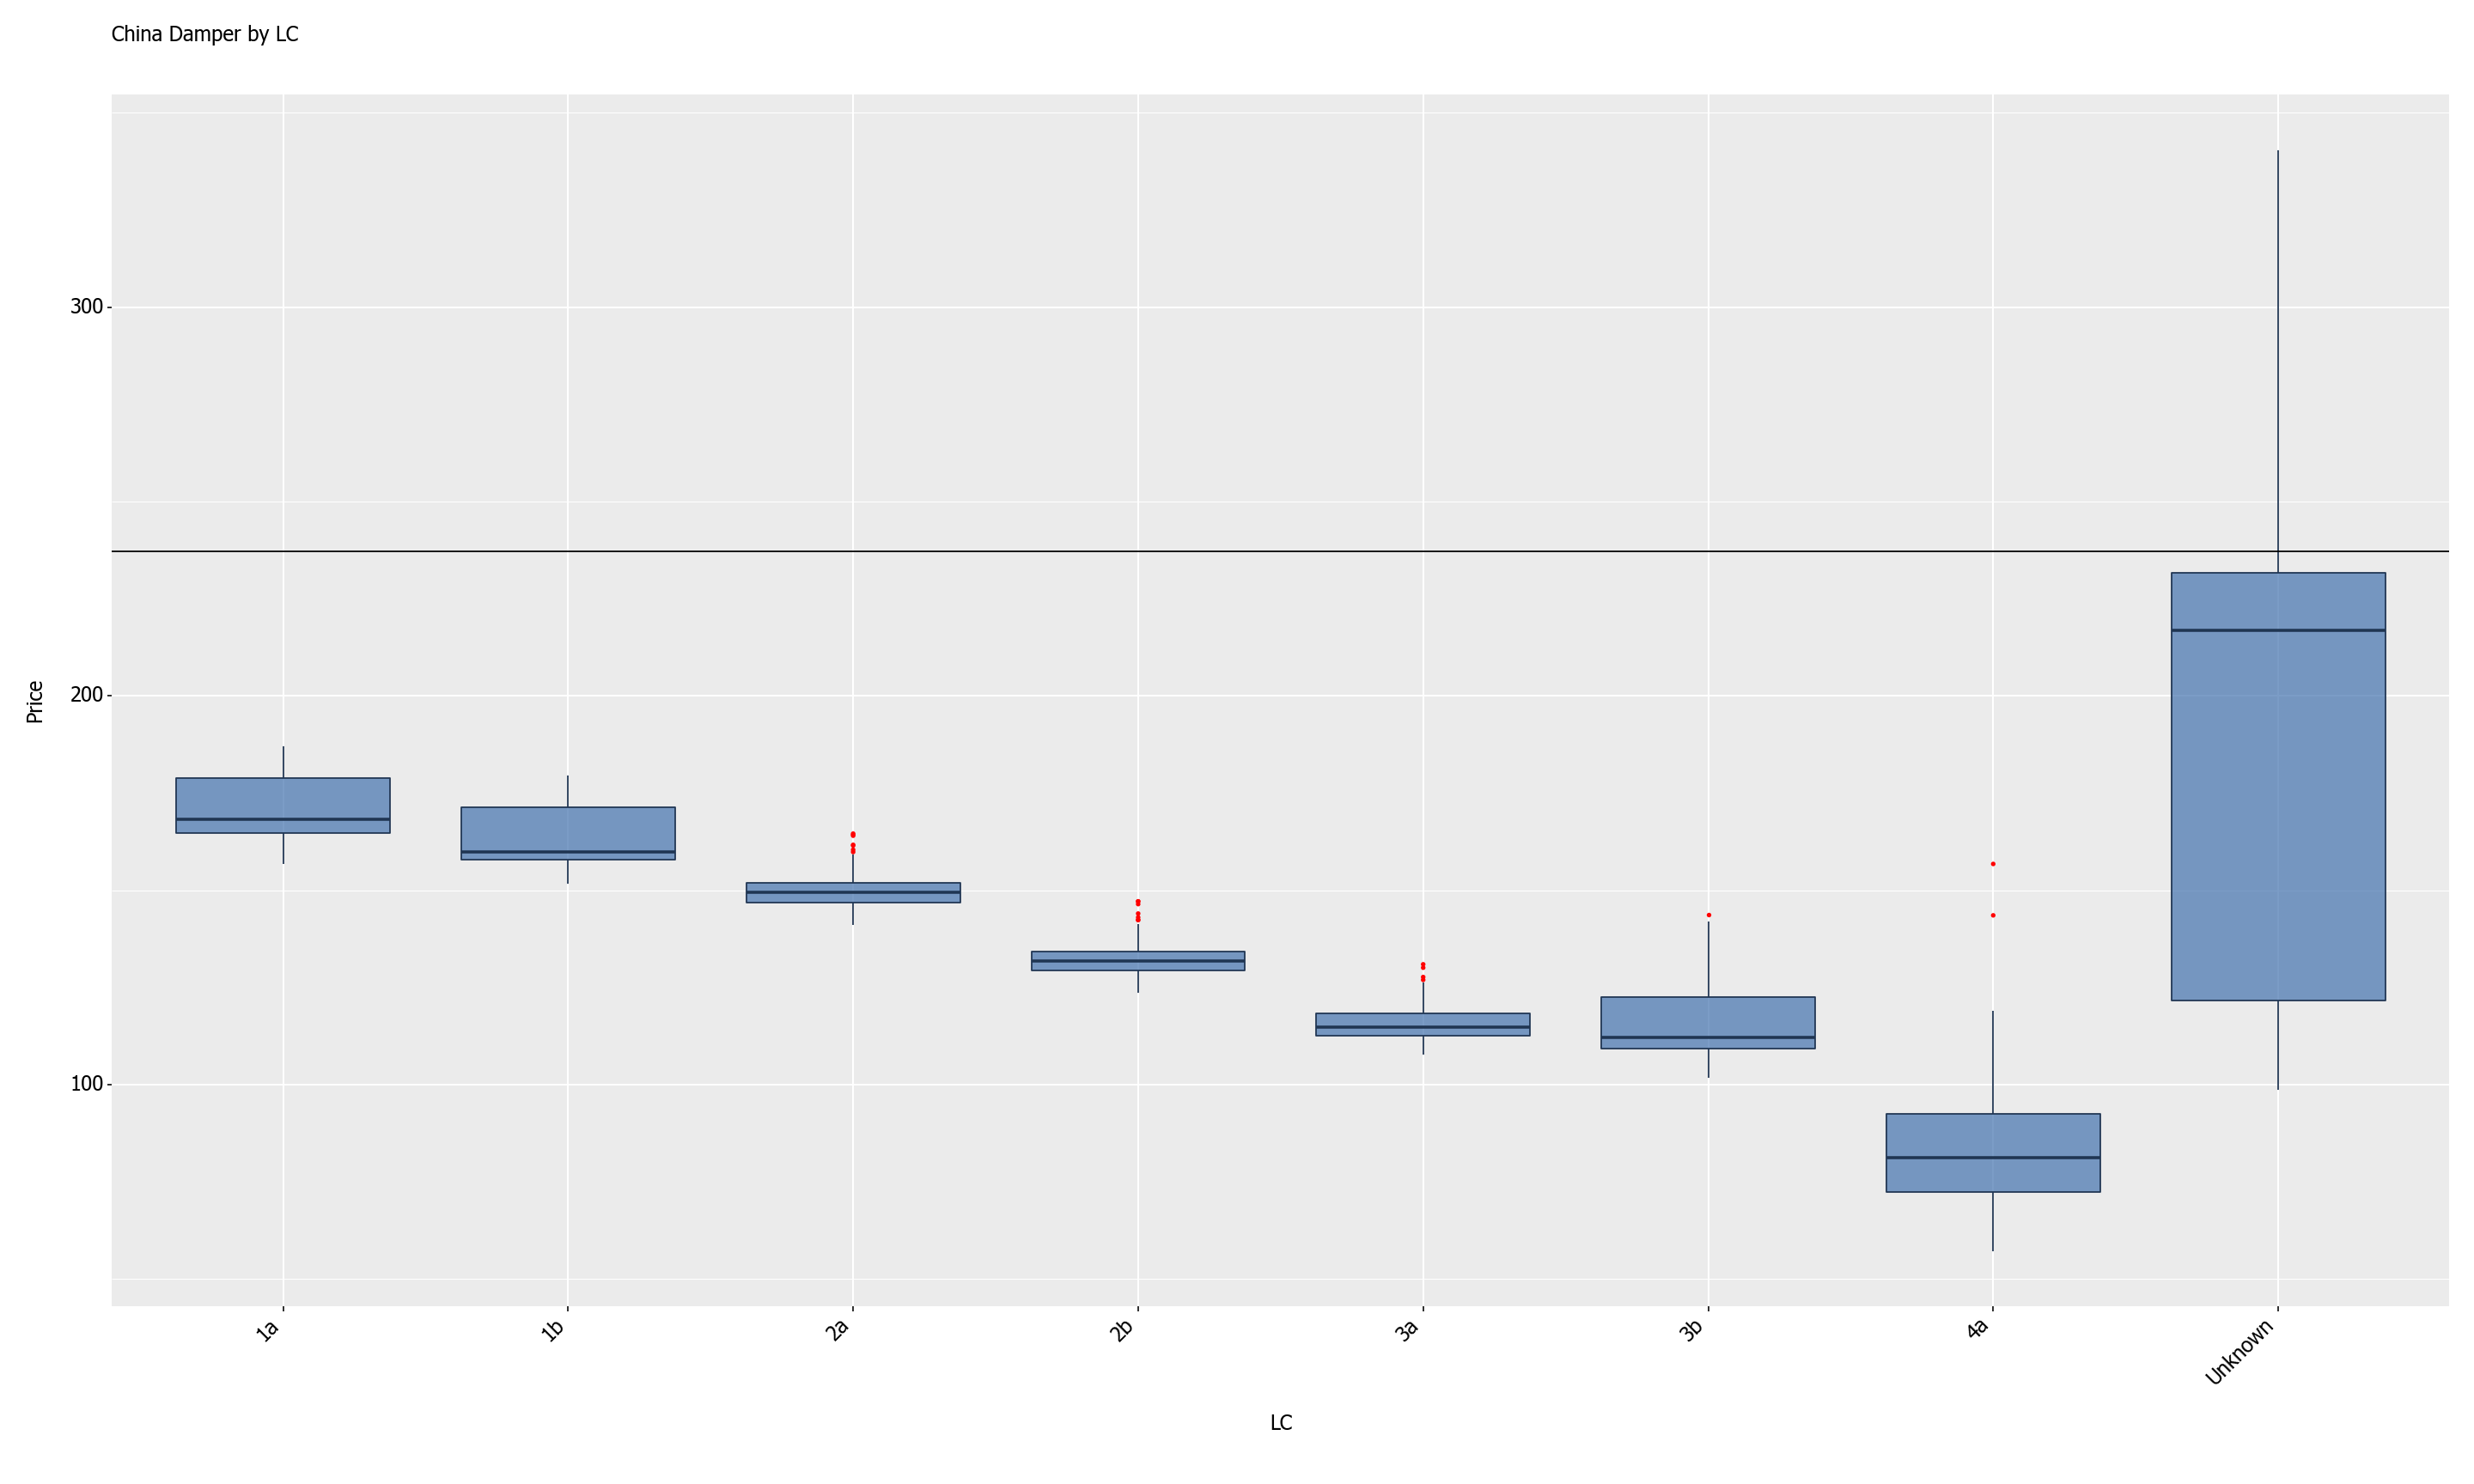

<Figure Size: (1440 x 864)>

In [19]:
#Box Plot
pct_threshold = 99.0
# censor below threshold
pct95facet = np.percentile(df_LC['Price'], pct_threshold)

box_dist = (
    ggplot(df_LC) + 
    geom_boxplot(
        aes(x = 'LC',
            y = 'Price'), colour="#1F3552", fill="#4271AE", 
                   alpha=0.7,
                   outlier_shape=".",
                   outlier_colour="red"       
    ) +
    labs(
        title ='China Damper by LC',
        x = 'LC',
        y = 'Price',
    ) +
    scale_y_continuous() +
    geom_hline(yintercept = pct95facet) + # add percentile solid line
    theme(axis_text_x = element_text(angle = 45, hjust = 1)) + 
    theme(figure_size=(20, 12)) + 
    theme(text=element_text(family="Tahoma", size=12)) +
    theme(axis_text_x=element_text(colour="black", size=12)) +
    theme(axis_text_y=element_text(colour="black", size=12))
)
box_dist

In [20]:
## Data Prep using pivot
x_pivot = df_LC.pivot(index= 'Year_Month' ,columns='LC' ,values='Price')
x_values = pd.DataFrame(x_pivot.to_records())
print(x_values)

   Year_Month          1a          1b          2a          2b          3a  \
0  2019-01-01  160.210073  151.619587  143.526129  127.698862  113.565668   
1  2019-02-01  156.800343  152.396121  143.298690  127.502648  110.508300   
2  2019-03-01  161.511972  152.731213  142.721859  126.842380  109.153748   
3  2019-04-01  163.561648  152.097462  141.367623  124.579177  107.868911   
4  2019-05-01  156.763091  153.448582  142.942188  126.223805  109.729549   
5  2019-06-01  162.374501  154.474302  144.637762  127.070905  108.909963   
6  2019-07-01  163.217832  157.353779  146.876546  128.860958  109.639613   
7  2019-08-01  164.304072  157.206508  145.985462  128.157255  108.485635   
8  2019-09-01  165.903359  153.981915  141.041785  123.610733  108.117357   
9  2019-10-01  162.421564  157.308474  144.420530  126.635697  107.678411   
10 2019-11-01  160.980480  157.789383  144.790914  127.225713  108.914980   
11 2019-12-01  163.632929  159.182075  148.628492  130.640456  112.966391   

In [21]:
percent_missing_x = x_values.isnull().sum() * 100 / len(x_values)
missing_value_df_x = pd.DataFrame({'column_name': x_values.columns,
                                 'percent_missing': percent_missing_x})
missing_value_df_x.sort_values(by=['percent_missing'])

,column_name,percent_missing
Year_Month,Year_Month,0.000000
1a,1a,0.000000
1b,1b,0.000000
2a,2a,0.000000
2b,2b,0.000000
3a,3a,0.000000
3b,3b,0.000000
4a,4a,0.000000
Unknown,Unknown,62.222222


In [22]:
mod_missing_value_df_x=missing_value_df_x[missing_value_df_x.percent_missing<=20]
mod_missing_value_df_x

,column_name,percent_missing
Year_Month,Year_Month,0.0
1a,1a,0.0
1b,1b,0.0
2a,2a,0.0
2b,2b,0.0
3a,3a,0.0
3b,3b,0.0
4a,4a,0.0


In [23]:
mod_missing_value_df_x=mod_missing_value_df_x.reset_index(drop=True)
mod_missing_value_df_x['column_name']

0    Year_Month
1            1a
2            1b
3            2a
4            2b
5            3a
6            3b
7            4a
Name: column_name, dtype: object

In [24]:
x_values_mod = x_values[x_values.columns[x_values.columns.isin(mod_missing_value_df_x['column_name'].astype('str'))]]
x_values_mod

,Year_Month,1a,1b,2a,2b,3a,3b,4a
0,2019-01-01,160.210073,151.619587,143.526129,127.698862,113.565668,111.136838,83.636000
1,2019-02-01,156.800343,152.396121,143.298690,127.502648,110.508300,110.565385,94.230000
2,2019-03-01,161.511972,152.731213,142.721859,126.842380,109.153748,111.809757,81.113750
3,2019-04-01,163.561648,152.097462,141.367623,124.579177,107.868911,108.049646,96.241667
4,2019-05-01,156.763091,153.448582,142.942188,126.223805,109.729549,105.105207,90.506364
5,2019-06-01,162.374501,154.474302,144.637762,127.070905,108.909963,108.179380,77.391579
6,2019-07-01,163.217832,157.353779,146.876546,128.860958,109.639613,109.010035,59.340000
7,2019-08-01,164.304072,157.206508,145.985462,128.157255,108.485635,104.961704,60.593846
8,2019-09-01,165.903359,153.981915,141.041785,123.610733,108.117357,106.616364,57.069474
9,2019-10-01,162.421564,157.308474,144.420530,126.635697,107.678411,101.782541,61.524737


In [25]:
y_pivot = df_LC.pivot( index = 'Year_Month',columns='LC', values='Qty')
y_values = pd.DataFrame(y_pivot.to_records())
print(y_values)

   Year_Month      1a       1b       2a       2b      3a     3b    4a  Unknown
0  2019-01-01   826.0  14271.0  28433.0  15635.0  3204.0  234.0  10.0      NaN
1  2019-02-01   875.0  15719.0  30933.0  17057.0  3659.0  260.0   8.0      NaN
2  2019-03-01  1486.0  28690.0  56973.0  29388.0  5979.0  411.0  16.0      NaN
3  2019-04-01  1402.0  24935.0  50833.0  26033.0  5124.0  395.0   6.0      NaN
4  2019-05-01  1679.0  24214.0  46122.0  23867.0  4281.0  338.0  11.0      NaN
5  2019-06-01  1873.0  30131.0  54430.0  27873.0  5321.0  371.0  19.0      NaN
6  2019-07-01  1628.0  23765.0  41448.0  21069.0  4004.0  286.0   8.0      NaN
7  2019-08-01  2348.0  30085.0  51300.0  26298.0  5363.0  358.0  26.0      NaN
8  2019-09-01  1816.0  24195.0  39447.0  20725.0  3851.0  275.0  19.0      NaN
9  2019-10-01  1867.0  22943.0  37270.0  19283.0  3971.0  303.0  19.0      NaN
10 2019-11-01  2064.0  25020.0  39548.0  21195.0  4337.0  298.0   6.0      NaN
11 2019-12-01  1485.0  17722.0  26102.0  13382.0  26

In [26]:
percent_missing_y = y_values.isnull().sum() * 100 / len(x_values)
missing_value_df_y = pd.DataFrame({'column_name': y_values.columns,
                                 'percent_missing': percent_missing_y})
missing_value_df_y.sort_values(by=['percent_missing'])

,column_name,percent_missing
Year_Month,Year_Month,0.000000
1a,1a,0.000000
1b,1b,0.000000
2a,2a,0.000000
2b,2b,0.000000
3a,3a,0.000000
3b,3b,0.000000
4a,4a,0.000000
Unknown,Unknown,62.222222


In [27]:
mod_missing_value_df_y=missing_value_df_y[missing_value_df_y.percent_missing<=20]

In [28]:
mod_missing_value_df_y=mod_missing_value_df_y.reset_index(drop=True)
mod_missing_value_df_y['column_name']

0    Year_Month
1            1a
2            1b
3            2a
4            2b
5            3a
6            3b
7            4a
Name: column_name, dtype: object

In [29]:
y_values_mod = y_values[y_values.columns[y_values.columns.isin(mod_missing_value_df_y['column_name'].astype('str'))]]
y_values_mod

,Year_Month,1a,1b,2a,2b,3a,3b,4a
0,2019-01-01,826.0,14271.0,28433.0,15635.0,3204.0,234.0,10.0
1,2019-02-01,875.0,15719.0,30933.0,17057.0,3659.0,260.0,8.0
2,2019-03-01,1486.0,28690.0,56973.0,29388.0,5979.0,411.0,16.0
3,2019-04-01,1402.0,24935.0,50833.0,26033.0,5124.0,395.0,6.0
4,2019-05-01,1679.0,24214.0,46122.0,23867.0,4281.0,338.0,11.0
5,2019-06-01,1873.0,30131.0,54430.0,27873.0,5321.0,371.0,19.0
6,2019-07-01,1628.0,23765.0,41448.0,21069.0,4004.0,286.0,8.0
7,2019-08-01,2348.0,30085.0,51300.0,26298.0,5363.0,358.0,26.0
8,2019-09-01,1816.0,24195.0,39447.0,20725.0,3851.0,275.0,19.0
9,2019-10-01,1867.0,22943.0,37270.0,19283.0,3971.0,303.0,19.0


In [30]:
results_values_raw = { "name": [], "price_elasticity": [], "price_mean": [],"quantity_mean": [], "intercept": [],  "t_score":[], "slope": [], "coefficient_pvalue" : [], "rsquared" : []}
# results_values_detrended = { "name": [], "price_elasticity": [], "price_mean": [],"quantity_mean": [], "intercept": [],  "t_score":[], "slope": [], "coefficient_pvalue" : [], "rsquared" : []}
results_values_deseasonalized = { "name": [], "price_elasticity": [], "price_mean": [],"quantity_mean": [], "intercept": [],  "t_score":[], "slope": [], "coefficient_pvalue" : [], "rsquared" : []}
results_values_log_raw = { "name": [], "price_elasticity": [], "price_mean": [],"quantity_mean": [], "intercept": [],  "t_score":[], "slope": [], "coefficient_pvalue" : [], "rsquared" : []}
# results_values_log_detrended = { "name": [], "price_elasticity": [], "price_mean": [],"quantity_mean": [], "intercept": [],  "t_score":[], "slope": [], "coefficient_pvalue" : [], "rsquared" : []}
results_values_log_deseasonalized = { "name": [], "price_elasticity": [], "price_mean": [],"quantity_mean": [], "intercept": [],  "t_score":[], "slope": [], "coefficient_pvalue" : [], "rsquared" : []}

In [31]:
for column in x_values_mod.columns[1:]:
    column_points = []
    for i in range(len(x_values_mod[column])):
        if not np.isnan(x_values_mod[column][i]) and not np.isnan(y_values_mod[column][i]):
            # column_points.append((x_values_mod[column][i], y_values_mod[column][i]))
            column_points.append((column,x_values_mod['Year_Month'][i],x_values_mod[column][i], y_values_mod[column][i]))
    # df = pd.DataFrame(list(column_points), columns= ['x_value', 'y_value'])
    df = pd.DataFrame(list(column_points), columns= ['LC','Date','x_value', 'y_value'])
    
    ## Deseasonalize
    # df.reset_index(inplace=False)
    df = df.set_index('Date')
    df.sort_index(inplace=True)
    df = df.resample('MS').asfreq().fillna(0)
    res = seasonal_decompose(df.y_value, extrapolate_trend='freq')
    # df['y_value'] = res.trend
    df['y_value_deseasonalized'] = df.y_value.values - res.seasonal
    df = pd.DataFrame(df)
    # print(df)
    # sns.lineplot(data = df[['y_value','y_value_deseasonalized']])
    # plt.title('Deseasonalized Plot')
    # plt.show()

    df['log_x_value'] = np.where(df['x_value'] > 0, np.log(df['x_value']) , 0)
    df['log_y_value'] = np.where(df['y_value'] > 0, np.log(df['y_value']) , 0) 
    df['log_y_value_deseasonalized'] = np.where(df['y_value_deseasonalized'] > 0, np.log(df['y_value_deseasonalized']) , 0)
    # print(df)
    
    # df['log_x_value'] = np.log(df['x_value'])
    # df['log_y_value'] = np.log(df['y_value'])
    # df['log_y_value_deseasonalized'] = np.log(df['y_value_deseasonalized'])



    #Raw Model
    x_value = df['x_value']
    y_value = df['y_value']
    X = sm.add_constant(x_value)
    model = sm.OLS(y_value, X)
    result = model.fit()
    
    #(Null Hypothesis test) Coefficient with a p value less than 0.05
#     if result.f_pvalue < 0.05:
        
    rsquared = result.rsquared
    coefficient_pvalue = result.f_pvalue
    intercept, slope = result.params
    mean_price = np.mean(x_value)
    mean_quantity = np.mean(y_value)
    tintercept, t_score = result.tvalues

    #Price elasticity Formula
    price_elasticity = (slope)*(mean_price/mean_quantity)    

    #Append results into dictionary for dataframe
    results_values_raw["name"].append(column)
    results_values_raw["price_elasticity"].append(price_elasticity)
    results_values_raw["price_mean"].append(mean_price)
    results_values_raw["quantity_mean"].append(mean_quantity)
    results_values_raw["intercept"].append(intercept)
    results_values_raw['t_score'].append(t_score)
    results_values_raw["slope"].append(slope)
    results_values_raw["coefficient_pvalue"].append(coefficient_pvalue)
    results_values_raw["rsquared"].append(rsquared*100)
    
    
    #Deseasonalized Model
    x_value = df['x_value']
    y_value = df['y_value_deseasonalized']
    X = sm.add_constant(x_value)
    model = sm.OLS(y_value, X)
    result = model.fit()
    
    #(Null Hypothesis test) Coefficient with a p value less than 0.05
#     if result.f_pvalue < 0.05:
        
    rsquared = result.rsquared
    coefficient_pvalue = result.f_pvalue
    intercept, slope = result.params
    mean_price = np.mean(x_value)
    mean_quantity = np.mean(y_value)
    tintercept, t_score = result.tvalues

    #Price elasticity Formula
    price_elasticity = (slope)*(mean_price/mean_quantity)    

    #Append results into dictionary for dataframe
    results_values_deseasonalized["name"].append(column)
    results_values_deseasonalized["price_elasticity"].append(price_elasticity)
    results_values_deseasonalized["price_mean"].append(mean_price)
    results_values_deseasonalized["quantity_mean"].append(mean_quantity)
    results_values_deseasonalized["intercept"].append(intercept)
    results_values_deseasonalized['t_score'].append(t_score)
    results_values_deseasonalized["slope"].append(slope)
    results_values_deseasonalized["coefficient_pvalue"].append(coefficient_pvalue)
    results_values_deseasonalized["rsquared"].append(rsquared*100)

   #Log Raw Model
    x_value = df['log_x_value']
    y_value = df['log_y_value']
    X = sm.add_constant(x_value)
    model = sm.OLS(y_value, X)
    result = model.fit()
    
    #(Null Hypothesis test) Coefficient with a p value less than 0.05
#     if result.f_pvalue < 0.05:
        
    rsquared = result.rsquared
    coefficient_pvalue = result.f_pvalue
    intercept, slope = result.params
    mean_price = np.mean(x_value)
    mean_quantity = np.mean(y_value)
    tintercept, t_score = result.tvalues

    #Price elasticity Formula
    price_elasticity = (slope)*(mean_price/mean_quantity)    

    #Append results into dictionary for dataframe
    results_values_log_raw["name"].append(column)
    results_values_log_raw["price_elasticity"].append(price_elasticity)
    results_values_log_raw["price_mean"].append(mean_price)
    results_values_log_raw["quantity_mean"].append(mean_quantity)
    results_values_log_raw["intercept"].append(intercept)
    results_values_log_raw['t_score'].append(t_score)
    results_values_log_raw["slope"].append(slope)
    results_values_log_raw["coefficient_pvalue"].append(coefficient_pvalue)
    results_values_log_raw["rsquared"].append(rsquared*100)
    
    
    #log Deseasonalized Model
    x_value = df['log_x_value']
    y_value = df['log_y_value_deseasonalized']
    X = sm.add_constant(x_value)
    model = sm.OLS(y_value, X)
    result = model.fit()
    
    #(Null Hypothesis test) Coefficient with a p value less than 0.05
#     if result.f_pvalue < 0.05:
        
    rsquared = result.rsquared
    coefficient_pvalue = result.f_pvalue
    intercept, slope = result.params
    mean_price = np.mean(x_value)
    mean_quantity = np.mean(y_value)
    tintercept, t_score = result.tvalues

    #Price elasticity Formula
    price_elasticity = (slope)*(mean_price/mean_quantity)    

    #Append results into dictionary for dataframe
    results_values_log_deseasonalized["name"].append(column)
    results_values_log_deseasonalized["price_elasticity"].append(price_elasticity)
    results_values_log_deseasonalized["price_mean"].append(mean_price)
    results_values_log_deseasonalized["quantity_mean"].append(mean_quantity)
    results_values_log_deseasonalized["intercept"].append(intercept)
    results_values_log_deseasonalized['t_score'].append(t_score)
    results_values_log_deseasonalized["slope"].append(slope)
    results_values_log_deseasonalized["coefficient_pvalue"].append(coefficient_pvalue)
    results_values_log_deseasonalized["rsquared"].append(rsquared*100)
    
df_raw = pd.DataFrame.from_dict(results_values_raw)
df_raw['ID'] = '1-Raw'
df_raw_deseasonalized = pd.DataFrame.from_dict(results_values_deseasonalized)
df_raw_deseasonalized['ID'] = '4-results_values_deseasonalized'
df_raw_log = pd.DataFrame.from_dict(results_values_log_raw)
df_raw_log['ID'] = '3-Log_Raw'
df_raw_deseasonalized_log = pd.DataFrame.from_dict(results_values_log_deseasonalized)
df_raw_deseasonalized_log['ID'] = '2-Log_results_values_deseasonalized'
final_df = pd.concat([df_raw,df_raw_deseasonalized,df_raw_log,df_raw_deseasonalized_log])
# final_df = pd.concat([df_raw])
df_elasticity =final_df[['ID','name','price_elasticity','t_score','coefficient_pvalue','slope','price_mean','quantity_mean','intercept','rsquared']]

In [32]:
final_df.sort_values(by=['rsquared'], ascending=False)

,name,price_elasticity,price_mean,quantity_mean,intercept,t_score,slope,coefficient_pvalue,rsquared,ID
0,1a,6.595508,170.825921,2731.569362,-15284.517399,12.264455,105.464596,1.243099e-15,77.768224,4-results_values_deseasonalized
0,1a,4.621493,5.139440,7.835631,-28.376683,10.476740,7.045965,2.060600e-13,71.851655,2-Log_results_values_deseasonalized
0,1a,6.707540,170.825921,2743.888889,-15660.855012,10.365310,107.739761,2.872616e-13,71.417111,1-Raw
0,1a,4.704631,5.139440,7.832267,-29.015664,9.396444,7.169639,5.515956e-12,67.248863,3-Log_Raw
5,3b,-2.561697,4.752679,5.405104,19.251344,-6.324066,-2.913355,1.234395e-07,48.188904,3-Log_Raw
5,3b,-2.489386,116.318237,236.177778,824.115417,-5.709651,-5.054561,9.654473e-07,43.121777,1-Raw
5,3b,-1.938550,4.752679,5.413244,15.907085,-5.358942,-2.207984,3.100968e-06,40.043164,2-Log_results_values_deseasonalized
1,1b,2.172857,163.253602,26813.043796,-31447.867165,5.260051,356.873664,4.301686e-06,39.152209,4-results_values_deseasonalized
1,1b,1.133355,5.094074,10.180440,-1.357611,5.027530,2.264995,9.249366e-06,37.020378,2-Log_results_values_deseasonalized
5,3b,-1.975805,116.318237,234.151307,696.788637,-4.868672,-3.977341,1.554465e-05,35.536064,4-results_values_deseasonalized


In [33]:
# good=np.where((final_df['rsquared']>=30) & (final_df['ID'].str.contains('1-Raw')))
# good=final_df.query('rsquared>=30 & ID.str.contains("1-Raw")')
good=final_df[final_df['rsquared']>=30]
good.sort_values(by=['rsquared',],ascending=False)

,name,price_elasticity,price_mean,quantity_mean,intercept,t_score,slope,coefficient_pvalue,rsquared,ID
0,1a,6.595508,170.825921,2731.569362,-15284.517399,12.264455,105.464596,1.243099e-15,77.768224,4-results_values_deseasonalized
0,1a,4.621493,5.139440,7.835631,-28.376683,10.476740,7.045965,2.060600e-13,71.851655,2-Log_results_values_deseasonalized
0,1a,6.707540,170.825921,2743.888889,-15660.855012,10.365310,107.739761,2.872616e-13,71.417111,1-Raw
0,1a,4.704631,5.139440,7.832267,-29.015664,9.396444,7.169639,5.515956e-12,67.248863,3-Log_Raw
5,3b,-2.561697,4.752679,5.405104,19.251344,-6.324066,-2.913355,1.234395e-07,48.188904,3-Log_Raw
5,3b,-2.489386,116.318237,236.177778,824.115417,-5.709651,-5.054561,9.654473e-07,43.121777,1-Raw
5,3b,-1.938550,4.752679,5.413244,15.907085,-5.358942,-2.207984,3.100968e-06,40.043164,2-Log_results_values_deseasonalized
1,1b,2.172857,163.253602,26813.043796,-31447.867165,5.260051,356.873664,4.301686e-06,39.152209,4-results_values_deseasonalized
1,1b,1.133355,5.094074,10.180440,-1.357611,5.027530,2.264995,9.249366e-06,37.020378,2-Log_results_values_deseasonalized
5,3b,-1.975805,116.318237,234.151307,696.788637,-4.868672,-3.977341,1.554465e-05,35.536064,4-results_values_deseasonalized


In [34]:
len(good)

10

In [35]:
# print(final_df.query('rsquared>=30 & name.str.contains("273031L")'))

In [36]:
final_df.to_csv("jay_new_lc_v3.csv")